1. Ustalenie zakresu danych 

2. Pobranie zdjęć z koordynatami

a) pobranie informacji o zdjęciach z bazy danych Sloan Digital Sky Survey (SDSS) za pomocą SDSS Query / CasJobs (https://skyserver.sdss.org/CasJobs/SubmitJob.aspx) do pliku csv

Poniższe zapytanie pobiera pierwsze 1000 obiektów z koordynatami i informacjami potrzebnymi do pobrania zdjęć.

![alt text](sdss_query.png "SDSS Query")

In [3]:
import pandas as pd
df = pd.read_csv("C:/Python_Marta/astro_project/image_list.csv")
df.head()

,objid,ra,dec,run,rerun,camcol,field
0,1237676302422379175,96.356700,6.654021,7178,301,1,206
1,1237676302411825797,75.012809,-4.752014,7178,301,1,45
2,1237676302414185026,79.756687,-2.216747,7178,301,1,81
3,1237676302422705529,96.900687,7.113349,7178,301,1,211
4,1237676302412743368,76.890922,-3.724654,7178,301,1,59


b) pobranie zdjęć na podstawie listy koordynatów ze strony skyserver.sdss.org

In [ ]:
import requests
import csv

def fetch_sdss_image(ra, dec, run, rerun, camcol, field, scale=0.2, width=512, height=512):
    url = f"http://skyserver.sdss.org/dr16/SkyServerWS/ImgCutout/getjpeg?ra={ra}&dec={dec}&scale={scale}&width={width}&height={height}&opt=G"
    response = requests.get(url)
    if response.status_code == 200:
        filename = f"sdss_image_{ra}_{dec}.jpg"
        with open(filename, "wb") as file:
            file.write(response.content)

# wczytanie danych z pliku CSV
with open('image_list.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        fetch_sdss_image(row['ra'], row['dec'], row['run'], row['rerun'], row['camcol'], row['field'])

3. Wczytywanie i przetwarzanie obrazów

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from astropy.wcs import WCS

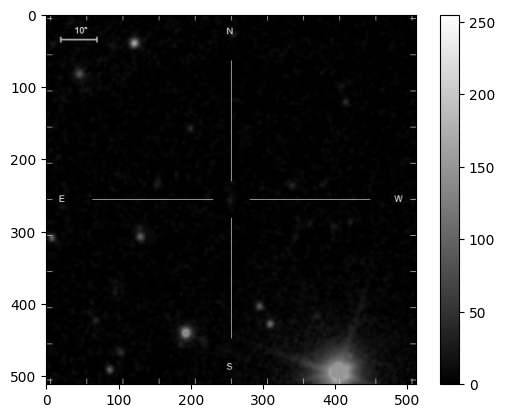

In [6]:
# Wczytywanie obrazu JPG
file_path = "C:/Python_Marta/astro_project/images/sdss_image_70.58434367425_-7.09142675200284.jpg"

# Odczyt obrazu za pomocą OpenCV
image_data = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

plt.imshow(image_data, cmap='gray')
plt.colorbar()
plt.show()